<a href="https://colab.research.google.com/github/MengyuLIANG1/rl_text_flappy_bird/blob/main/RL_assignment_MengyuLIANG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**By Mengyu LIANG**

In [1]:
! pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to /tmp/pip-req-build-zkhzuygz
  Running command git clone --filter=blob:none --quiet https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git /tmp/pip-req-build-zkhzuygz
  Resolved https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to commit bdbddee93a6d59029989c32cc41748adb2724f51
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 9.4 MB/s eta 0:00:00
  Created wheel for text-flappy-bird-gym: filename=text_flappy_bird_gym-0.1.0-py3-none-any.whl size=7808 sha256=a6baabfa10c7240759b413dd194764623b02979da0ff38e68b48749087ee0203
  Stored in directory: /tmp/pip-ephem-wheel-cache-6rimutb

In [2]:
import gymnasium as gym
import text_flappy_bird_gym
import os
import sys
import time
import random,math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict
from tqdm import tqdm
import pickle


In [3]:
if __name__ == '__main__':

    # initiate environment
    env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
    obs = env.reset()

    # iterate
    while True:

        # Select next action
        action = env.action_space.sample()  # for an agent, action = agent.policy(observation)

        # Appy action and return new observation of the environment
        obs, reward, done, _, info = env.step(action)

        # Render the game
        os.system("clear")
        sys.stdout.write(env.render())
        time.sleep(0.2) # FPS

        # If player is dead break
        if done:
            break

    env.close()

Text Flappy Bird!
Score: 0
----------------------
[                  | ]
[                  | ]
[                  | ]
[                    ]
[                    ]
[                    ]
[      @             ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
[                  | ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Flap)
Distance From Pipe (dx=12,dy=1)
Text Flappy Bird!
Score: 0
----------------------
[                 |  ]
[                 |  ]
[                 |  ]
[                    ]
[                    ]
[      @             ]
[                    ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
[                 |  ]
^^^^^^^^^^^^^^^^^^^^^^
Player Action (Flap)
Distance From Pipe (dx=11,dy=0)
Text Flappy Bird!
Score: 0
----------------------
[       

## Q-learning Agent

In [4]:
class QlearningAgent():

    def __init__(self, eps, lr, discount):
        self.eps = eps
        self.lr = lr
        self.discount = discount

    def act(self, state): #epsilon-greedy policy

        if np.random.uniform(0, 1) < self.eps:
            action = env.action_space.sample()
            return action
        else:
            action = np.argmax(q[state])
            return action
        
    def update(self):
        old_value = q[state][action]
        next_max = np.max(q[next_state])
        
        new_value = (1 - self.lr) * old_value + self.lr * (reward +  self.discount * next_max)
        q[state][action] = new_value

## Sarsa Agent

In [5]:
class SarsaAgent():

    def __init__(self, eps, lr, discount):
        self.eps = eps
        self.lr = lr
        self.discount = discount

    def act(self, state): #epsilon-greedy policy

        if np.random.uniform(0, 1) < self.eps:
            action = env.action_space.sample()
            return action
        else:
            action = np.argmax(q[state])
            return action
        
    def update(self):
        q[state][action]+= self.lr * (reward + self.discount * (q[next_state][next_action]) - q[state][action])

## Training agents

In [ ]:
agents = {
    "Q-learning":QlearningAgent,
    "Sarsa": SarsaAgent
}

all_the_q_tables = {}
all_reward_sums = {} # Contains sum of rewards during episode
num_episodes=1000

for algorithm in ["Q-learning", "Sarsa"]:

    q = defaultdict(lambda: np.zeros(2))
    all_reward_sums[algorithm] = []
    current_agent = agents[algorithm](eps=0.2, lr=0.7, discount=0.95)
    total_epochs = 0
    for i in tqdm(range(num_episodes)):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:
            action = current_agent.act(state)
            # Apply action and return new observation of the environment
            next_state, reward, done, _, info = env.step(action)
            # For SARSA acquiring the on-policy next action
            next_action = current_agent.act(next_state)
            
            if done == True:
                reward = -1
            total_reward += reward
            current_agent.update()
            state = next_state
            if done:
                break
                
        all_reward_sums[algorithm].append(total_reward)
        env.close()
    all_the_q_tables[algorithm] = q

100%|██████████| 1000/1000 [00:01<00:00, 908.70it/s]


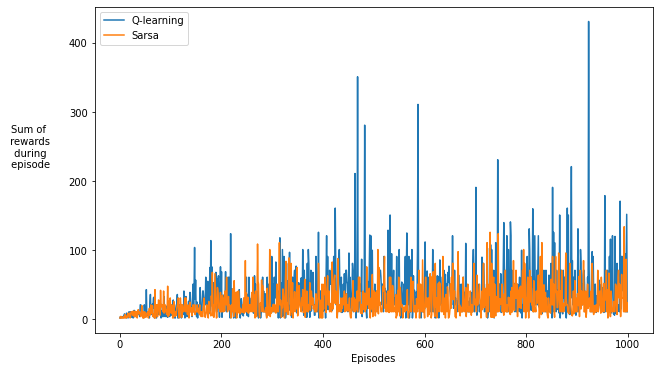

In [ ]:
plt.figure(figsize=(10,6))
for algorithm in ["Q-learning", "Sarsa"]:
    plt.plot(all_reward_sums[algorithm], label=algorithm)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode",rotation=0, labelpad=40)
plt.legend()
plt.show()

## State-Value plot

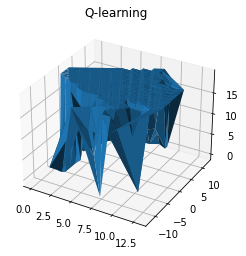

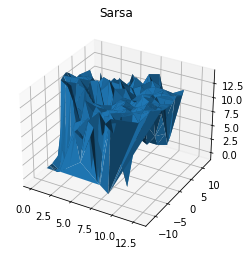

In [ ]:

for algorithm in ["Q-learning", "Sarsa"]:
  q_policy = dict((k,np.max(v)) for k, v in all_the_q_tables[algorithm].items())
  x_list = []
  y_list = []
  z_list = []
  for key in q_policy.keys():
    x_list.append(key[0])
    y_list.append(key[1])
  for value in q_policy.values():
    z_list.append(value)

  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  ax.plot_trisurf(x_list, y_list, z_list)
  ax.set_title(algorithm)
plt.show()

## Parameter tuning

### Learning rate

In [6]:
agents = {
    "Q-learning":QlearningAgent,
    "Sarsa": SarsaAgent
}

all_reward_sums = {} # Contains sum of rewards during episode
learning_rate=np.arange(0, 1.02, 0.02)
num_episodes=1000

for algorithm in ["Q-learning", "Sarsa"]:
  all_reward_sums[algorithm] = []
  for lr in learning_rate:
    q = defaultdict(lambda: np.zeros(2))
    current_agent = agents[algorithm](eps=0.2, lr=lr, discount=0.95)
    total_epochs = 0
    for i in range(num_episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:
            action = current_agent.act(state)
            # Apply action and return new observation of the environment
            next_state, reward, done, _, info = env.step(action)
            # For SARSA acquiring the on-policy next action
            next_action = current_agent.act(next_state)
            
            if done == True:
                reward = -1
            total_reward += reward
            current_agent.update()
            state = next_state
            if done:
                break
                
    all_reward_sums[algorithm].append(np.mean(total_reward))
    env.close()

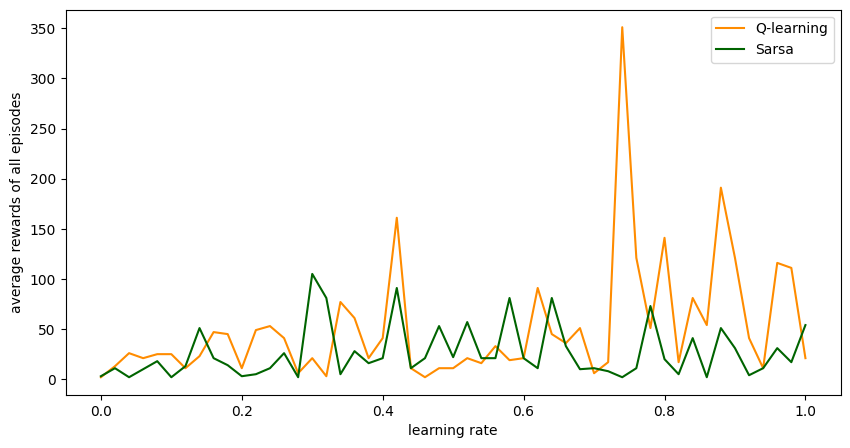

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(learning_rate, all_reward_sums['Q-learning'],label="Q-learning", color = 'darkorange')
ax.plot(learning_rate, all_reward_sums['Sarsa'],label="Sarsa", color = 'darkgreen')
ax.set_xlabel('learning rate')
ax.set_ylabel('average rewards of all episodes')
ax.legend()
plt.show()
     

### Discount rate

In [14]:
agents = {
    "Q-learning":QlearningAgent,
    "Sarsa": SarsaAgent
}

all_reward_sums = {} # Contains sum of rewards during episode
discount_rate=np.arange(0, 1.02, 0.02)
num_episodes=1000

for algorithm in ["Q-learning", "Sarsa"]:
  all_reward_sums[algorithm] = []
  for discount in discount_rate:
    q = defaultdict(lambda: np.zeros(2))
    current_agent = agents[algorithm](eps=0.2, lr=0.7, discount=discount)
    total_epochs = 0
    for i in range(num_episodes):
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:
            action = current_agent.act(state)
            # Apply action and return new observation of the environment
            next_state, reward, done, _, info = env.step(action)
            # For SARSA acquiring the on-policy next action
            next_action = current_agent.act(next_state)
            
            if done == True:
                reward = -1
            total_reward += reward
            current_agent.update()
            state = next_state
            if done:
                break
                
    all_reward_sums[algorithm].append(np.mean(total_reward))
    env.close()

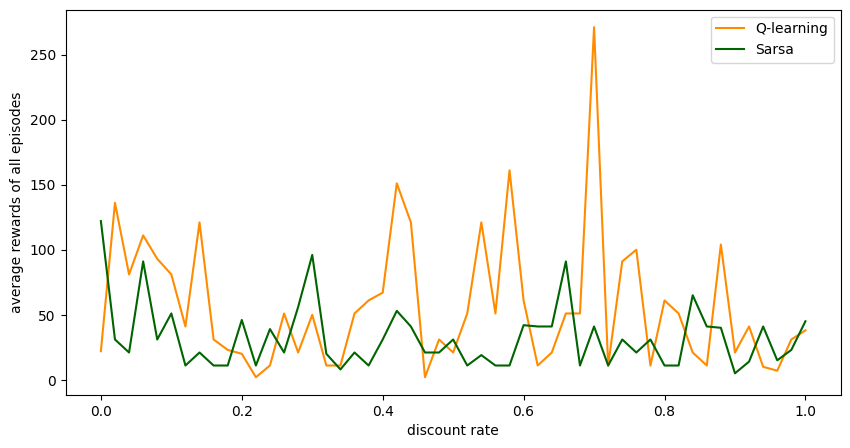

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(discount_rate, all_reward_sums['Q-learning'],label="Q-learning", color = 'darkorange')
ax.plot(discount_rate, all_reward_sums['Sarsa'],label="Sarsa", color = 'darkgreen')
ax.set_xlabel('discount rate')
ax.set_ylabel('average rewards of all episodes')
ax.legend()
plt.show()
     